In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from random import randrange
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

## new columns

In [2]:
data = pd.read_csv('all_final2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98515 entries, 0 to 98514
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                98515 non-null  int64  
 1   origin                    98515 non-null  object 
 2   destination               98515 non-null  object 
 3   model                     98515 non-null  object 
 4   code                      98515 non-null  object 
 5   operator                  98515 non-null  object 
 6   STD                       98515 non-null  object 
 7   ATD                       98515 non-null  object 
 8   STA                       98515 non-null  object 
 9   ATA                       98515 non-null  object 
 10  departure_delay           98515 non-null  float64
 11  arrival_delay             98515 non-null  float64
 12  is_delayed_arrival        98515 non-null  bool   
 13  is_delayed_departure      98515 non-null  bool   
 14  origin

In [3]:
data = data.drop(columns= ['Unnamed: 0', 'origin_icao', 'destination_icao', 'ATD', 'ATA'])

In [4]:
for column in ['departure_delay', 'arrival_delay']:
    data[column]=np.where(data[column]>200,randrange(120, 200),data[column])
    
data['alti'] = np.where(data['alti']>35,31,data['alti'])
data['alti_a'] = np.where(data['alti_a']>35,31,data['alti_a'])

data['Age'] = np.where(data['Age']>35,31,data['Age'])

In [5]:
data[['STD', 'STA']] = data[['STD', 'STA']].apply(pd.to_datetime)
data['month'] = [i.month for i in data.STD.to_list()]
data['month_day'] = [i.day for i in data.STD.to_list()]
data['hour'] = [i.hour for i in data.STD.to_list()]


b = [0, 8, 14, 20, 24]
l = ['Night', 'Morning','Day','Eve']
data['part_of_day'] = pd.cut(data['hour'], bins=b, labels=l, include_lowest=True)

In [6]:
data.to_csv('final3.csv', index=False)

In [7]:
data.tail()

,origin,destination,model,code,operator,STD,STA,departure_delay,arrival_delay,is_delayed_arrival,...,is_delayed_90_departure,is_delayed_90_arrival,is_delayed_120_departure,is_delayed_120_arrival,delayed_group_d,delayed_group_a,month,month_day,hour,part_of_day
98510,SSH,KBP,UR-WRW,A320,Windrose Airlines,2019-05-09 15:10:00,2019-05-09 19:10:00,0.0,0.0,False,...,False,False,False,False,0,0,5,9,15,Day
98511,DNK,SSH,UR-WRW,A320,Windrose Airlines,2019-05-09 10:15:00,2019-05-09 14:10:00,15.0,0.0,False,...,False,False,False,False,0,0,5,9,10,Morning
98512,SSH,DNK,UR-WRW,A320,Windrose Airlines,2019-05-09 05:10:00,2019-05-09 09:05:00,0.0,3.0,True,...,False,False,False,False,0,0,5,9,5,Night
98513,KBP,SSH,UR-WRW,A320,Windrose Airlines,2019-05-09 00:10:00,2019-05-09 04:10:00,8.0,0.0,False,...,False,False,False,False,0,0,5,9,0,Night
98514,AYT,DNK,UR-WRW,A320,Windrose Airlines,2019-05-08 03:55:00,2019-05-08 06:15:00,12.0,0.0,False,...,False,False,False,False,0,0,5,8,3,Night


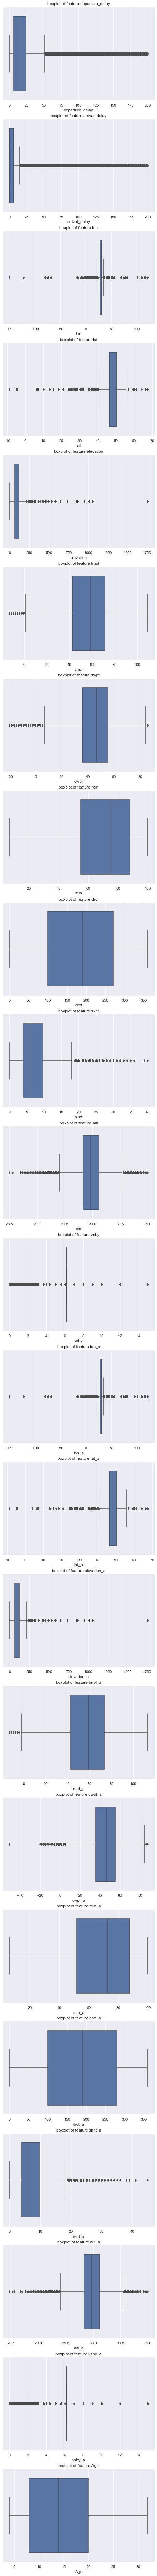

In [8]:
numeric = ['departure_delay', 'arrival_delay', 'lon', 'lat', 'elevation', 'tmpf', 'dwpf',
       'relh', 'drct', 'sknt', 'alti', 'vsby', 'lon_a', 'lat_a', 'elevation_a',
       'tmpf_a', 'dwpf_a', 'relh_a', 'drct_a', 'sknt_a', 'alti_a', 'vsby_a',
       'Age']
fig, axes = plt.subplots(len(numeric))
fig.set_size_inches(8, 6 * len(numeric))
for i in range(len(numeric)):
    sns.boxplot(x=numeric[i], data=data, ax=axes[i]).set_title('boxplot of feature '+ numeric[i])

In [5]:
dd = pd.read_csv('final3.csv')
data = dd.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98515 entries, 0 to 98514
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   origin                    98515 non-null  object 
 1   destination               98515 non-null  object 
 2   model                     98515 non-null  object 
 3   code                      98515 non-null  object 
 4   operator                  98515 non-null  object 
 5   STD                       98515 non-null  object 
 6   STA                       98515 non-null  object 
 7   departure_delay           98515 non-null  float64
 8   arrival_delay             98515 non-null  float64
 9   is_delayed_arrival        98515 non-null  bool   
 10  is_delayed_departure      98515 non-null  bool   
 11  lon                       98515 non-null  float64
 12  lat                       98515 non-null  float64
 13  elevation                 98515 non-null  float64
 14  tmpf  

## encoding

In [7]:
dependent_unnec = ['is_delayed_15_departure', 'is_delayed_15_arrival',
                 'is_delayed_30_departure', 'is_delayed_30_arrival',
                 'is_delayed_60_departure', 'is_delayed_60_arrival',
                 'is_delayed_90_departure', 'is_delayed_90_arrival',
                 'is_delayed_120_departure', 'is_delayed_120_arrival',
                 'delayed_group_d', 'delayed_group_a', 'is_delayed_arrival', 'is_delayed_departure',
                 'STD', 'STA', 'hour', 'departure_delay', 'arrival_delay']
X = data.drop(columns=dependent_unnec)



In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98515 entries, 0 to 98514
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   origin       98515 non-null  object 
 1   destination  98515 non-null  object 
 2   model        98515 non-null  object 
 3   code         98515 non-null  object 
 4   operator     98515 non-null  object 
 5   lon          98515 non-null  float64
 6   lat          98515 non-null  float64
 7   elevation    98515 non-null  float64
 8   tmpf         98515 non-null  float64
 9   dwpf         98515 non-null  float64
 10  relh         98515 non-null  float64
 11  drct         98515 non-null  float64
 12  sknt         98515 non-null  float64
 13  alti         98515 non-null  float64
 14  vsby         98515 non-null  float64
 15  lon_a        98515 non-null  float64
 16  lat_a        98515 non-null  float64
 17  elevation_a  98515 non-null  float64
 18  tmpf_a       98515 non-null  float64
 19  dwpf

In [10]:
X.describe(include='O')

,origin,destination,model,code,operator,day_of_week,part_of_day
count,98515,98515,98515,98515,98515,98515,98515
unique,156,151,50,17,4,7,4
top,KBP,KBP,UR-PSW,B738,Ukraine Int. Airlines,Sunday,Night
freq,42759,40697,3290,38427,71139,14805,41058


In [11]:
for feature in ['origin', 'destination', 'model', 'code']:
        X[feature] = pd.Categorical(X[feature]).codes
X =pd.get_dummies(X, columns=['operator', 'day_of_week', 'part_of_day'],drop_first=True)
X.head()

,origin,destination,model,code,lon,lat,elevation,tmpf,dwpf,relh,...,operator_YanAir,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,part_of_day_Eve,part_of_day_Morning,part_of_day_Night
0,69,102,0,0,30.4500,50.4000,179.0,73.4,60.8,64.69,...,0,1,0,0,0,0,0,0,0,0
1,106,67,0,0,35.3167,47.8667,113.0,62.6,51.8,67.75,...,0,1,0,0,0,0,0,0,0,1
2,69,102,0,0,30.4500,50.4000,179.0,73.4,50.0,43.69,...,0,0,0,0,0,0,1,0,0,0
3,106,67,0,0,35.3167,47.8667,113.0,57.2,50.0,76.82,...,0,0,0,0,0,0,1,0,0,1
4,69,102,0,0,30.4500,50.4000,179.0,64.4,50.0,59.50,...,0,1,0,0,0,0,0,0,0,0


## oversampling

In [ ]:
X_new = X.copy()

In [12]:
smote_dep = ['is_delayed_15_departure', 'is_delayed_15_arrival',
                 'is_delayed_30_departure', 'is_delayed_30_arrival',
                 'is_delayed_60_departure', 'is_delayed_60_arrival',
                 'is_delayed_90_departure', 'is_delayed_90_arrival',
                 'is_delayed_120_departure', 'is_delayed_120_arrival',
                 'delayed_group_d', 'delayed_group_a', 'is_delayed_arrival', 'is_delayed_departure']

In [ ]:
for target in smote_dep:
    y = data[target]
    print(y.value_counts(normalize=True))
    oversample = SMOTE()
    X_ov, y_ov = oversample.fit_resample(X, y)
    print(y_ov.value_counts(normalize = True))
    f = X_ov.copy()
    f[target] = y_ov
    f.to_csv(target + '_smote.csv', index = False)

In [ ]:
y = data['delayed_group_a_smote.csv']

In [67]:
dirs = [ 'is_delayed_120_arrival',
 'is_delayed_120_departure',
 'is_delayed_15_arrival',
 'is_delayed_15_departure',
 'is_delayed_30_arrival',
 'is_delayed_30_departure',
 'is_delayed_60_arrival',
 'is_delayed_60_departure',
 'is_delayed_90_arrival',
 'is_delayed_90_departure',
 'is_delayed_arrival',
 'is_delayed_departure']

gr = ['delayed_group_a', 'delayed_group_d']

In [ ]:

'''for n_estimators_ in [30, 100]:
            for max_depth_ in [12, 20]:
                for max_features_ in [9, 18]:
                    for min_samples_leaf_ in [100, 400]:
                        for min_samples_split_ in [300, 1000]:'''

In [76]:
print('random forest')
start_time = time.time()
for file in gr:
    print('working with', file)
    
    df = pd.read_csv(file+'_smote.csv')

    X = df.drop([file], axis = 1)
    y = df[file].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
    
    try:
    
        n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split, times = [], [], [], [], [], []

        acc_train, acc_test, oob, f1_train, f1_test = [], [], [], [], []

        for n_estimators_ in [30, 100]:
            for max_depth_ in [12, 20]:
                for max_features_ in [9, 18]:
                    for min_samples_leaf_ in [100, 400]:
                        for min_samples_split_ in [300, 1000]:
                                n_estimators.append(n_estimators_)
                                max_depth.append(max_depth_)
                                max_features.append(max_features_)
                                min_samples_leaf.append(min_samples_leaf_)
                                min_samples_split.append(min_samples_split_)
                                print('n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split =',
                                      n_estimators_, max_depth_, max_features_, min_samples_leaf_, min_samples_split_)
                                start_time = time.time()
                                rfcl = RandomForestClassifier(n_estimators=n_estimators_, oob_score=True,
                                                              max_depth=max_depth_,
                                                              max_features=max_features_,
                                                              min_samples_leaf=min_samples_leaf_,
                                                              min_samples_split=min_samples_split_, bootstrap=True,
                                                              random_state=1)
                                rfcl.fit(X_train, y_train)
                                time_ = time.time() - start_time
                                print("--- %s seconds ---" % (time.time() - start_time))
                                times.append(round(time_, 1))
                                oob.append(rfcl.oob_score_)
                                y_predict = rfcl.predict(X_train)
                                train_score = accuracy_score(y_train, y_predict)
                                f1_train.append(f1_score(y_train, y_predict, average='weighted'))
                                acc_train.append(train_score)
                                y_t_predict = rfcl.predict(X_test)
                                test_score = accuracy_score(y_test, y_t_predict)
                                acc_test.append(test_score)
                                f1_test.append(f1_score(y_test, y_t_predict, average='weighted'))
                                print('TRAIN SCORE f1', train_score, 'TEST SCORE f1', test_score, '\n\n')
    except:
                                               print('oh wow why')
                                               
    try:
        df = pd.DataFrame(list(zip(acc_train, acc_test, oob, n_estimators, max_depth, max_features, min_samples_leaf,
                                   min_samples_split, times, f1_train, f1_test)),
                          columns=['acc_train', 'acc_test', 'oob_score', 'n_trees', 'max_depth', 'max_features',
                                   'min_samples_leaf', 'min_samples_split', 'times', 'f1_train', 'f1_test'])

        df.to_csv('bm_random_forest_' + file + '.csv', index=False)
                                               
                                               
    except:
                                               print('problem sor')
                                               

    
print("--- %s seconds ---" % (time.time() - start_time))

random forest
working with delayed_group_a
n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 100 300
--- 68.08016872406006 seconds ---
TRAIN SCORE f1 0.5027013273398074 TEST SCORE f1 0.49444895212839646 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 100 1000
--- 63.07452940940857 seconds ---
TRAIN SCORE f1 0.4734772344966993 TEST SCORE f1 0.468840909540678 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 400 300
--- 65.67277669906616 seconds ---
TRAIN SCORE f1 0.4602434163097409 TEST SCORE f1 0.4560302916361573 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 400 1000
--- 60.36863303184509 seconds ---
TRAIN SCORE f1 0.461051976874037 TEST SCORE f1 0.4565712137103956 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 18 100 300
--- 119.31407022476196 seconds ---
TRAIN SCORE f1 0.4950313105183552 TEST 

d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 32.86599636077881 seconds ---
TRAIN SCORE f1 0.489737040212004 TEST SCORE f1 0.4777792443826214 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 100 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 31.64640522003174 seconds ---
TRAIN SCORE f1 0.450686880730352 TEST SCORE f1 0.4445674136197951 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 400 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 32.20800542831421 seconds ---
TRAIN SCORE f1 0.437967511868655 TEST SCORE f1 0.43241377209637627 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 9 400 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 30.563345909118652 seconds ---
TRAIN SCORE f1 0.4413616643531311 TEST SCORE f1 0.43463737067083635 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 18 100 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 60.37062931060791 seconds ---
TRAIN SCORE f1 0.49822242142319423 TEST SCORE f1 0.4842165114885926 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 18 100 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 58.381110429763794 seconds ---
TRAIN SCORE f1 0.44901156187583496 TEST SCORE f1 0.4436942196590482 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 18 400 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 56.412206172943115 seconds ---
TRAIN SCORE f1 0.4442858572628336 TEST SCORE f1 0.43723664571678056 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 12 18 400 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 56.204806089401245 seconds ---
TRAIN SCORE f1 0.43859847611256403 TEST SCORE f1 0.4323325447511905 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 9 100 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 40.5655677318573 seconds ---
TRAIN SCORE f1 0.57231502956829 TEST SCORE f1 0.547025556153479 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 9 100 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 39.280999183654785 seconds ---
TRAIN SCORE f1 0.49196934819217863 TEST SCORE f1 0.48075419590004975 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 9 400 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 36.14598727226257 seconds ---
TRAIN SCORE f1 0.4788975096494015 TEST SCORE f1 0.46816395739625744 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 9 400 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 34.315271615982056 seconds ---
TRAIN SCORE f1 0.47166100249339665 TEST SCORE f1 0.46120886596472704 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 18 100 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 71.82600665092468 seconds ---
TRAIN SCORE f1 0.5737031509048898 TEST SCORE f1 0.5488024043294175 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 18 100 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 66.25294208526611 seconds ---
TRAIN SCORE f1 0.48762657360306694 TEST SCORE f1 0.474895673628527 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 18 400 300


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 62.91991448402405 seconds ---
TRAIN SCORE f1 0.47697415657486497 TEST SCORE f1 0.4653514605692006 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 30 20 18 400 1000


d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


--- 61.51756286621094 seconds ---
TRAIN SCORE f1 0.47150870077934964 TEST SCORE f1 0.4615642355999147 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 100 12 9 100 300
--- 109.77457046508789 seconds ---
TRAIN SCORE f1 0.4957116188801908 TEST SCORE f1 0.48283564662043477 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 100 12 9 100 1000
--- 105.14394903182983 seconds ---
TRAIN SCORE f1 0.45257107050699064 TEST SCORE f1 0.44708546132055355 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 100 12 9 400 300
--- 103.33179354667664 seconds ---
TRAIN SCORE f1 0.44522142493483663 TEST SCORE f1 0.43890180629308856 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 100 12 9 400 1000
--- 101.06485033035278 seconds ---
TRAIN SCORE f1 0.4438985757613998 TEST SCORE f1 0.43813014651382387 


n_estimators, max_depth, max_features, min_samples_leaf, min_samples_split = 100 12 18 100 

In [47]:
from sklearn.metrics import f1_score

In [41]:
X = X.drop(['model', 'code', 'lon', 'lat', 'elevation',
       'operator_Ukraine Int. Airlines', 'operator_Windrose Airlines',
       'operator_YanAir'], axis = 1)

0.7291798371801984
              precision    recall  f1-score   support

       False       0.73      0.72      0.73     38634
        True       0.73      0.74      0.73     38875

    accuracy                           0.73     77509
   macro avg       0.73      0.73      0.73     77509
weighted avg       0.73      0.73      0.73     77509

0.7161048109300615
              precision    recall  f1-score   support

       False       0.72      0.71      0.72     13039
        True       0.71      0.72      0.72     12798

    accuracy                           0.72     25837
   macro avg       0.72      0.72      0.72     25837
weighted avg       0.72      0.72      0.72     25837

0.8146527840951381
              precision    recall  f1-score   support

       False       0.78      0.88      0.83     60343
        True       0.86      0.75      0.80     60576

    accuracy                           0.81    120919
   macro avg       0.82      0.81      0.81    120919
weighted avg     

d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


0.5464052765390582
              precision    recall  f1-score   support

           0       0.58      0.78      0.67     41062
           1       0.43      0.30      0.35     41039
           2       0.45      0.40      0.42     41006
           3       0.58      0.48      0.52     41118
           4       0.60      0.72      0.65     40970
           5       0.58      0.60      0.59     41027

    accuracy                           0.55    246222
   macro avg       0.54      0.55      0.53    246222
weighted avg       0.54      0.55      0.53    246222

0.5269756561152131
              precision    recall  f1-score   support

           0       0.57      0.77      0.66     13654
           1       0.41      0.28      0.33     13677
           2       0.43      0.38      0.40     13710
           3       0.54      0.44      0.49     13598
           4       0.58      0.70      0.64     13746
           5       0.56      0.59      0.57     13689

    accuracy                           

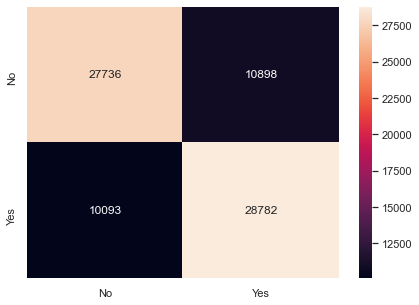

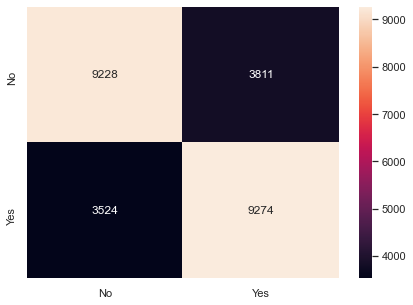

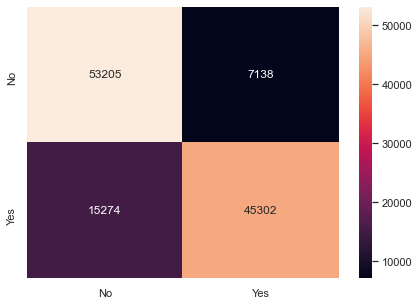

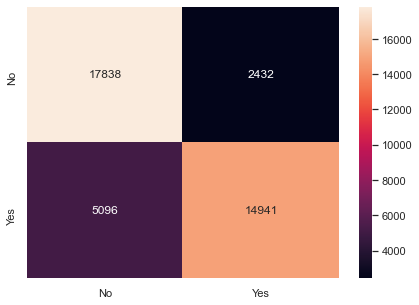

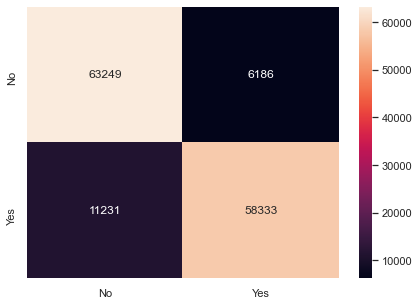

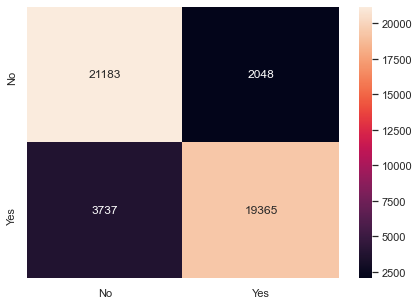

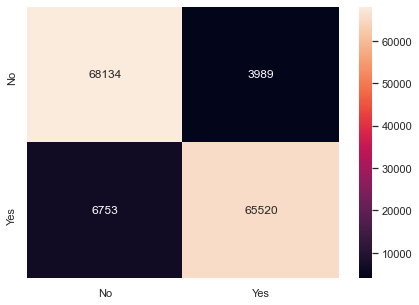

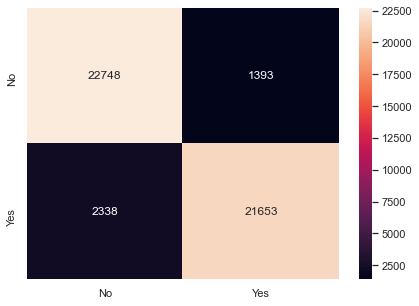

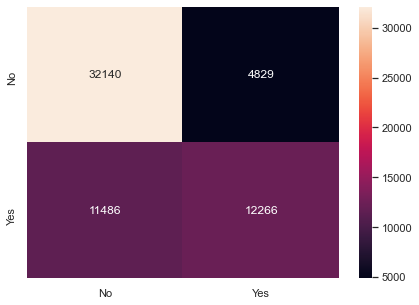

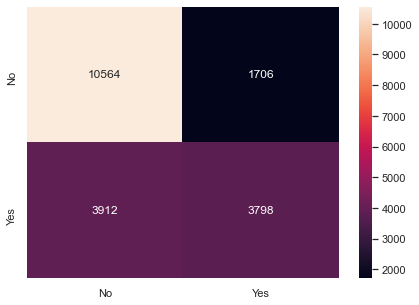

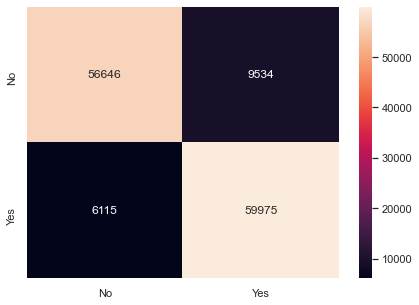

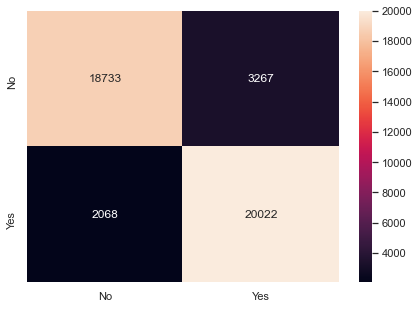

In [121]:
for dependent_d in ['is_delayed_15_departure','is_delayed_30_departure','is_delayed_60_departure',
                   'is_delayed_120_departure','delayed_group_d', 'is_delayed_departure',]:
    y = data[dependent_d]
    oversample = SMOTE()
    X_ov, y_ov = oversample.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_ov, y_ov, test_size=.25, random_state=1)
    
    rfcl = RandomForestClassifier(n_estimators=30, oob_score=True, max_depth=20, max_features=18, min_samples_leaf=100,
                                  min_samples_split=400, bootstrap=True, random_state=1)
    rfcl.fit(X_train, y_train)
    
    
    y_predict = rfcl.predict(X_train)
    print(rfcl.score(X_train, y_train))
    cm=confusion_matrix(y_train, y_predict,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                      columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    print(classification_report(y_train, y_predict))
    
    y_predict = rfcl.predict(X_test)
    print(rfcl.score(X_test, y_test))
    cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                      columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    print(classification_report(y_test, y_predict))
    

<AxesSubplot:>

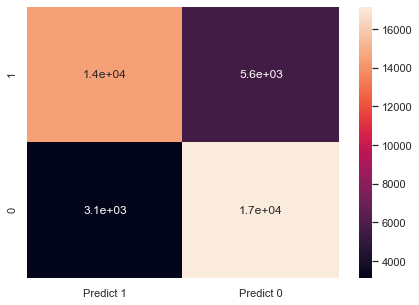

In [113]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

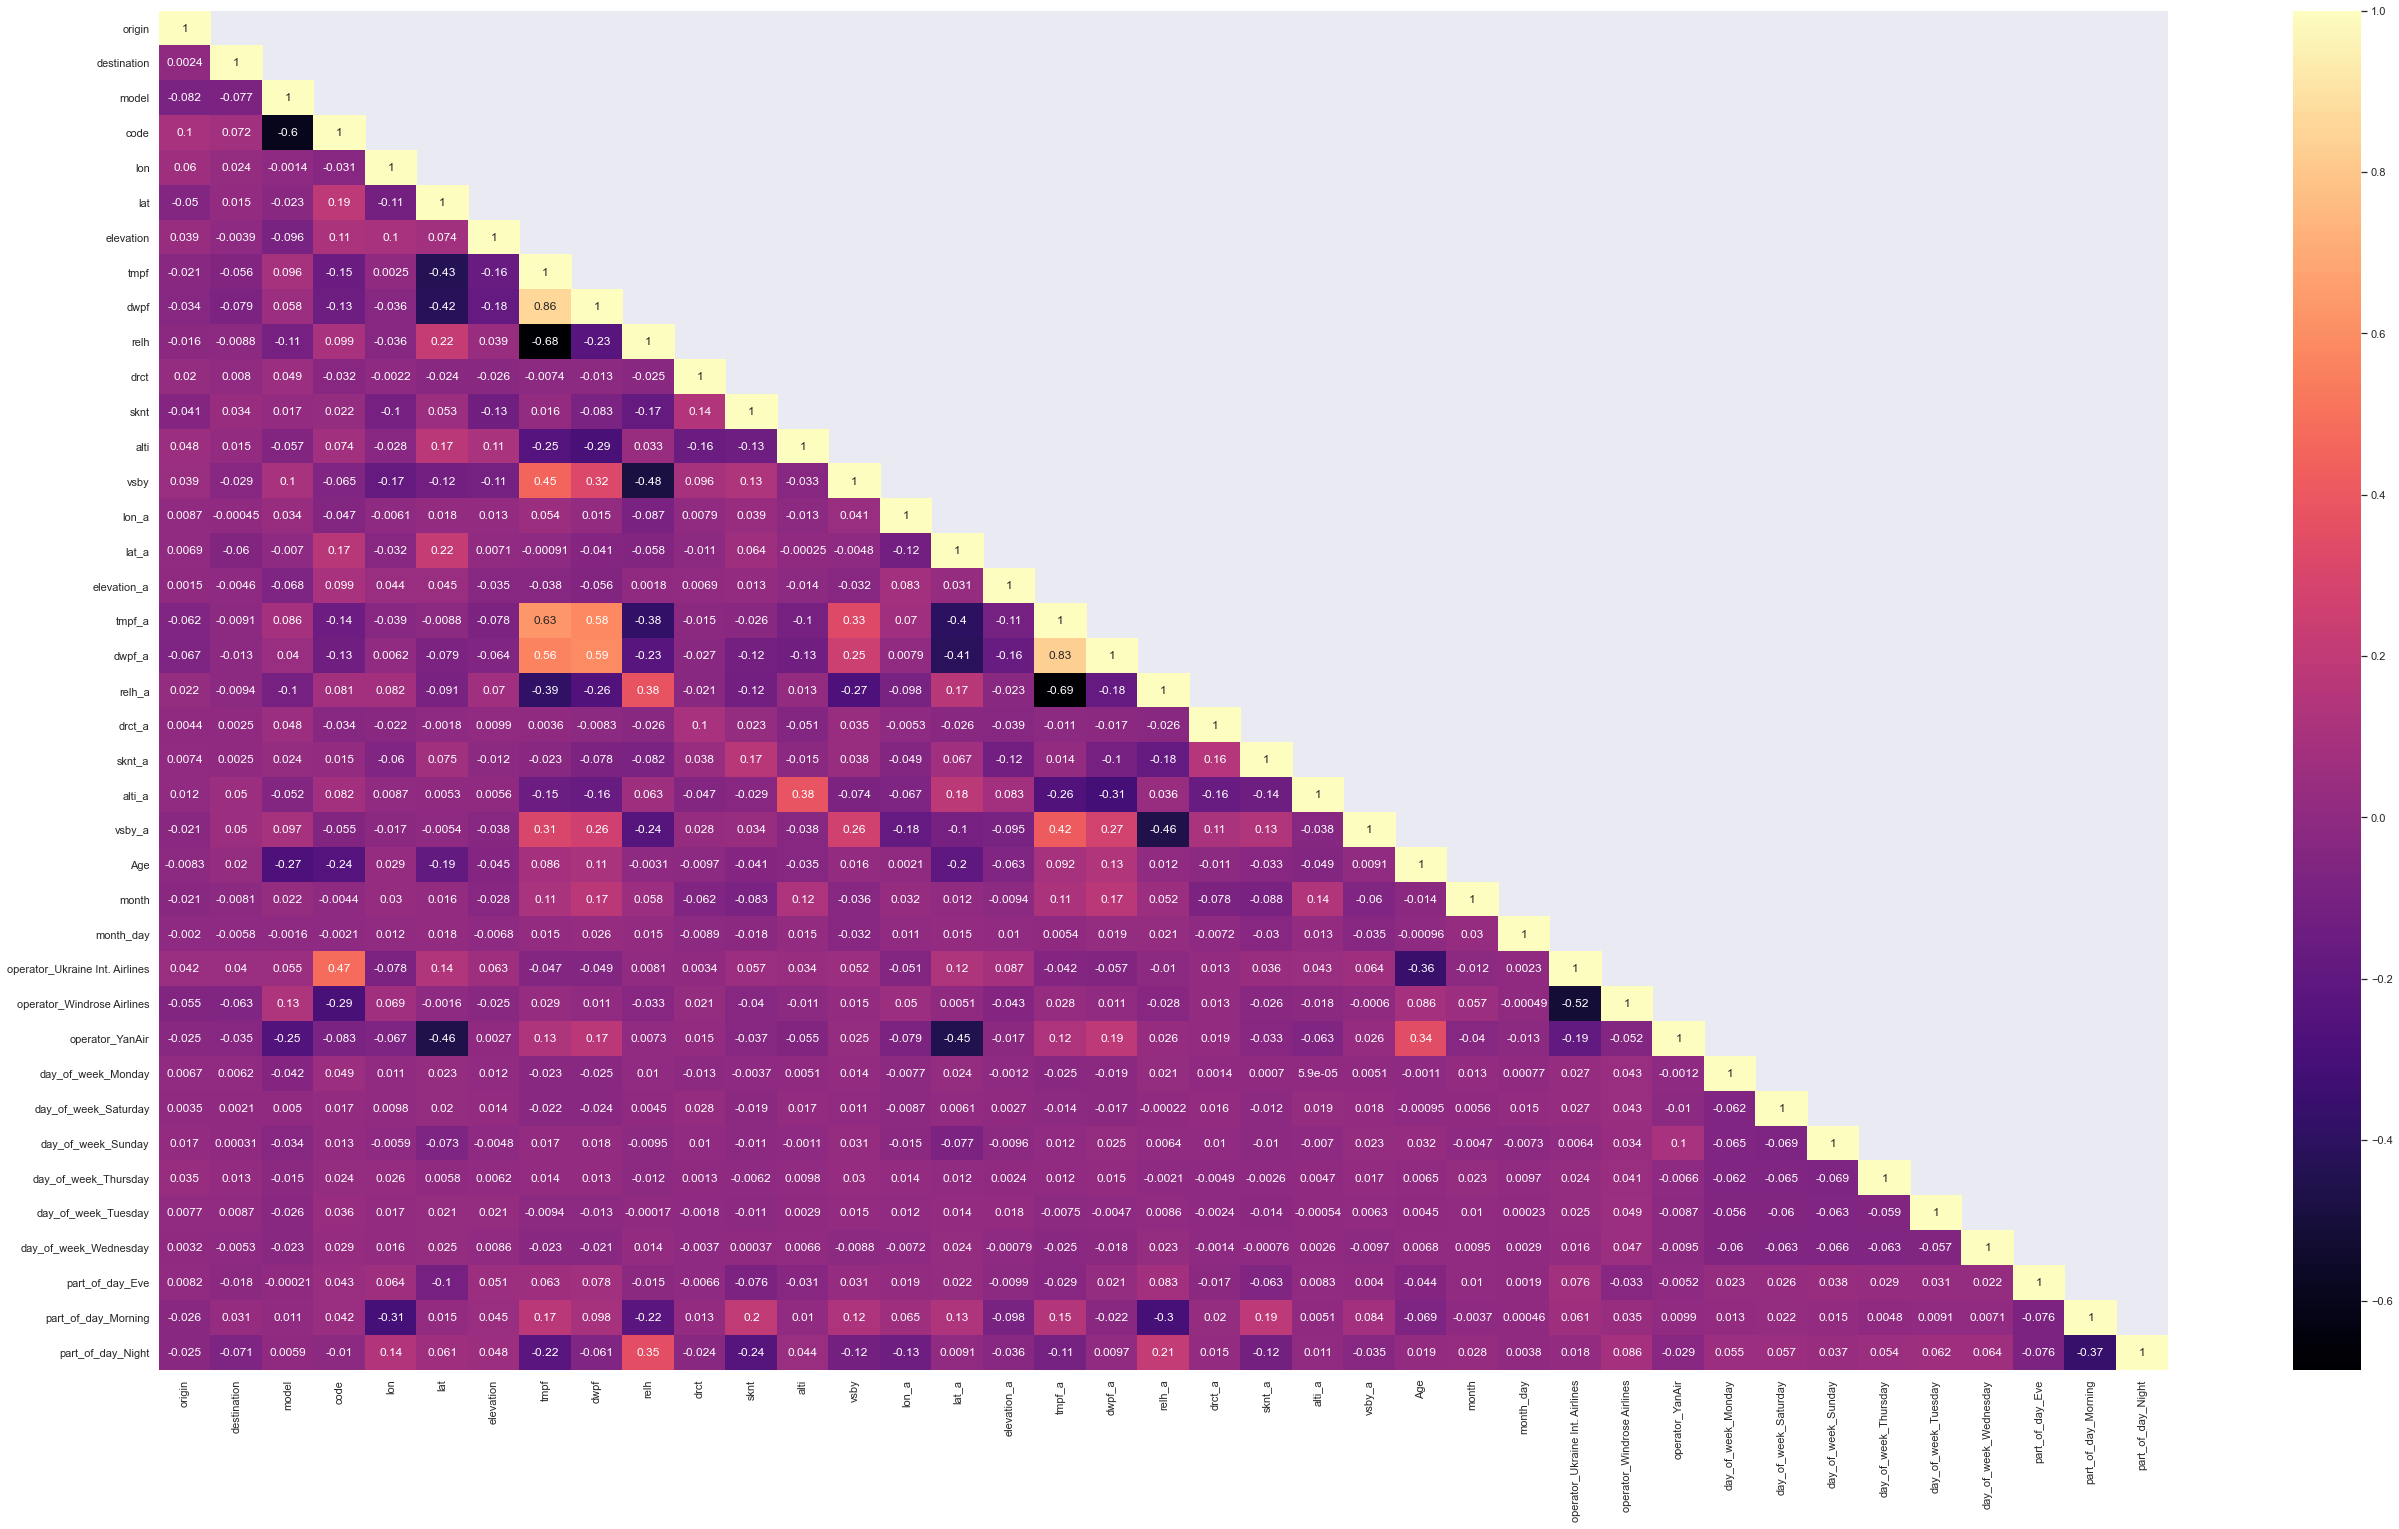

In [81]:
cor=X.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(45,25))
sns.heatmap(cor, mask = mask, annot = True, cmap="magma");

knn

In [84]:
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
for file in dirs:
    print('working with', file)
    
    df = pd.read_csv(file+'_smote.csv')

    X = df.drop([file], axis = 1)
    y = df[file].copy()
    
    XScaled  = X.apply(zscore)
    X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=3)
    
    model_lr = KNeighborsClassifier(n_neighbors= 100)
    model_lr.fit(X_train, y_train)

    print('Accuracy on train data', model_lr.score(X_train, y_train))
    print('Accuracy on test data', model_lr.score(X_test, y_test))

working with is_delayed_120_arrival
Accuracy on train data 0.885387180437199
Accuracy on test data 0.883584618576665
working with is_delayed_120_departure
Accuracy on train data 0.8786145181755448
Accuracy on test data 0.8768676743018404
working with is_delayed_15_arrival
Accuracy on train data 0.8117263341722739
Accuracy on test data 0.8069071588366891
working with is_delayed_15_departure
Accuracy on train data 0.7032014597329352
Accuracy on test data 0.6952651270803767
working with is_delayed_30_arrival
Accuracy on train data 0.8430990097446184
Accuracy on test data 0.8404517983490566
working with is_delayed_30_departure
Accuracy on train data 0.8092736004536675
Accuracy on test data 0.8041680449884221
working with is_delayed_60_arrival
Accuracy on train data 0.8661497730711044
Accuracy on test data 0.8645557555861485
working with is_delayed_60_departure
Accuracy on train data 0.8552092005056579
Accuracy on test data 0.8536510791366907
working with is_delayed_90_arrival
Accuracy on t